Just a small notebook to point out that KFold and Stratified may not do what you think. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

Import training dataset and get target data. Now sort the target so that all ones are at the end of the row.

In [2]:
trn = pd.read_csv("../input/train.csv")
target = trn.target.copy()
target.sort_values(inplace=True)

Using KFold with shuffle set to True I would expect target to be mixed up in both training and validation sets. So let's try this and plot the obtained target data.

Text(0.5,1,'KFold Shuffle=True ?')

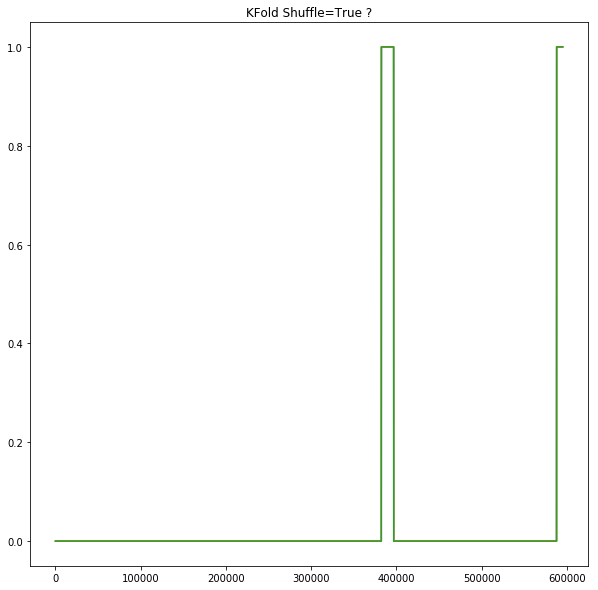

In [3]:
# Create folds
folds = KFold(n_splits=3, shuffle=True, random_state = 45)
# Go through folds
plt.figure(figsize=(10,10))
for trn_idx, val_idx in folds.split(target, target):
    # Stack training target and validation target and plot them
    plt.plot(np.hstack((target.iloc[trn_idx].values, target.iloc[val_idx].values)))
plt.title("KFold Shuffle=True ?")

So in fact zeros and ones are absolutely not mixed. The original sortation is kept!

To understand what KFold exactly does I will use a simple index and display and 2-fold KFold with and without shuffling


Text(0.5,1,'KFold Shuffle=False')

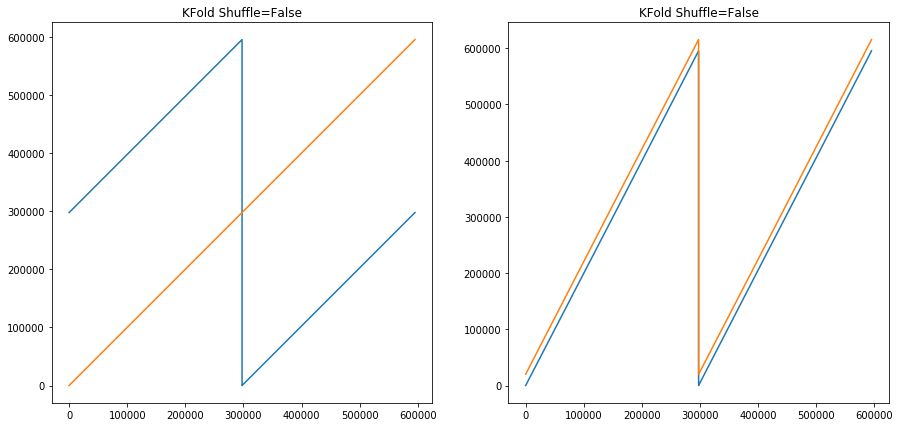

In [4]:
plt.figure(figsize=(15,7))
from matplotlib.gridspec import GridSpec
gs = GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
# Create folds
kfolds = KFold(n_splits=2, shuffle=False, random_state=2645312378)
# Go through folds
idx = np.arange(len(target))
for trn_idx, val_idx in kfolds.split(trn.values):
    # Stack training target and validation target and plot them
    ax1.plot(np.hstack((idx[trn_idx], idx[val_idx])))
ax1.set_title("KFold Shuffle=False")

ax2 = plt.subplot(gs[0, 1])
# Create folds
kfolds = KFold(n_splits=2, shuffle=True, random_state=2645312378)
# Go through folds
idx = np.arange(len(target))
for I, (trn_idx, val_idx) in enumerate(kfolds.split(trn.values)):
    # Stack training target and validation target and plot them
    ax2.plot(np.hstack((idx[trn_idx], idx[val_idx])) + 20000 * I)
ax2.set_title("KFold Shuffle=False")

On the right hand plot,  the second split has been shifted to show both splits are printed. 

When shuffle is False the plot is as expected. On the first split train and validation indexes stay in place, in the second split the second half of the indices come first and the first half is used for validation.

When shuffle is True, indices of training and validation folds are taken from the full range of indices but they remain in ascending order. So it won't change the order in which samples appear...

Let's see if StratifiedKFold has a different behaviour.

Text(0.5,1,'StratifiedKFold Shuffle=True ?')

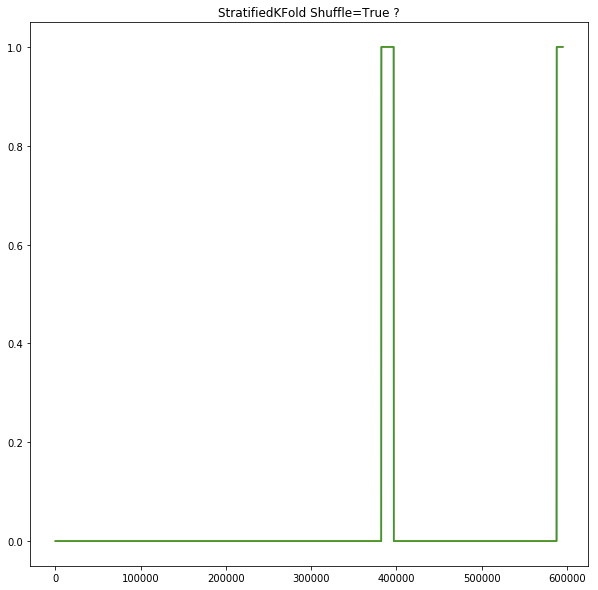

In [5]:
# Create folds
plt.figure(figsize=(10,10))
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 5)
# Go through folds
for trn_idx, val_idx in folds.split(target, target):
    # Stack training target and validation target and plot them
    plt.plot(np.hstack((target.iloc[trn_idx].values, target.iloc[val_idx].values)))
plt.title("StratifiedKFold Shuffle=True ?")

Again zeros and ones are not mixed up !

In short, if you want the original sample sortation being mixed up you have to do something like this :

Text(0.5,1,'StratifiedKFold Shuffle=True ?')

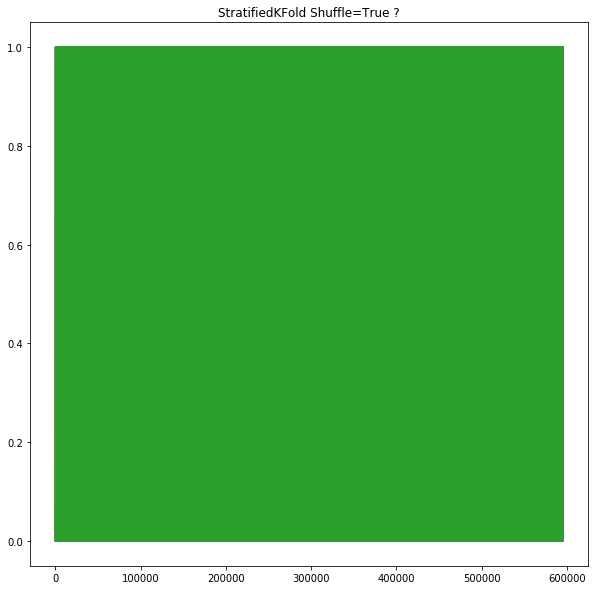

In [6]:
idx = target.index.values
np.random.shuffle(idx)
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state = 5)
# Go through folds
plt.figure(figsize=(10,10))
for trn_idx, val_idx in folds.split(target, target):
    # Stack training target and validation target and plot them
    plt.plot(np.hstack((target.loc[idx[trn_idx]].values, 
                        target.loc[idx[val_idx]].values)))
plt.title("StratifiedKFold Shuffle=True ?")